# Tarea 2 

Ciencia de redes

> Thamara Lopez y Fabián Ortega



In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import collections
import networkx as nx
from community import community_louvain


%matplotlib inline

In [2]:
import csv
authors_graph = nx.Graph()

with open('data/CA-GrQc.txt', 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        authors_graph.add_edge(row[0], row[1])

## Ejercicio 1

Cree una lista de tuplas (nodo, grado de nodo) y busque el nodo con el grado máximo.  
grado de nodo = número de vecinos

In [28]:
# Busqueda del nodo con grado máximo
print(f"El nodo con el grado máximo es: {max(nx.degree_centrality(authors_graph), key=nx.degree_centrality(authors_graph).get)}" )

El nodo con el grado máximo es: 21012


In [63]:
# Creamos lista de tuplas con nodo y grado de nodo
lista = [(k, v) for k, v in nx.degree_centrality(authors_graph).items()]

def Sort_Tuple(tup): 
     '''Función para ordenar listas de tuplas'''
     tup.sort(key = lambda x: x[1], reverse=True) 
     return tup 

Sort_Tuple(lista)[0:5] # Muestro los 5 nodos con mayor grado de nodo

[('21012', 0.015455065827132226),
 ('21281', 0.01507345926349933),
 ('22691', 0.014691852699866437),
 ('12365', 0.014691852699866437),
 ('6610', 0.012974623163518412)]

## Ejercicio 2

Trace un histograma de centralidad de grado de author_graph.

Sugerencia: `plt.hist(list_of_values)` trazará un histograma

(count vs grado)

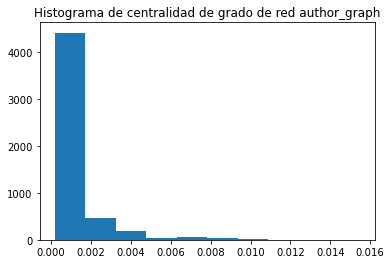

In [56]:
centralidad = nx.degree_centrality(authors_graph)
plt.hist(centralidad.values())
plt.title('Histograma de centralidad de grado de red author_graph')
plt.show()

### Ejercicio 3

Encuentre el "número" del autor '22504' del grafo `author_graph`, si no hay conexión entre los nodos, asignele el número '-1'.
También trace un histograma del "número" autor '22504'.

Encuentre la longitud de ruta más corta promedio en el primer componente, es decir, `graphs[0]`

SUGERENCIA: `nx.shortest_path_length`

**Lo hicimos en clase**

In [68]:
# Guardamos subgrafos en una lista
graphs = [authors_graph.subgraph(c).copy() for c in sorted(nx.connected_components(authors_graph), key=len, reverse=True)]

d = {}
for node in authors_graph.nodes():#para cada nodo
    try:
        #calcula la longitud del camino mas corto entre node y `22504`
        d[node] = nx.shortest_path_length(graphs[0], '22504', node) #21012;22504
    except:
        #si arroja error (no hay camino) asinga un -1.
        next

4